# Elastic-Net

El regresor denominado *Elastic-Net* combina en su función de coste las regularizaciones propuestas por los regresores *Ridge* (*$\ell2$ regularization*) y *LASSO* (*$\ell1$ regularization*). El peso de cada una de las regularizaciones es ponderado mediante un hiper-parámetro *r*.

La función de coste asociada a *Elastic-Net* que queremos minimizar será:

$$\hat{y}_i = \sum_{f=1}^F w_f \cdot x_{i,f}$$

$$\min_w \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + r \cdot \alpha \sum_{f=1}^F |w_f| + \frac{1-r}{2} \alpha \sum_{f=1}^F w_f^2$$

Donde $N$ es el número de muestras de nuestro conjunto de datos y $F$ es el número de *features* del mismo.

Nótese que el modelo descrito dispone de dos hiper-parámetros que permiten ajustar la importancia de los coeficientes de regularización:

- $\alpha$ permite definir el peso de la regularización (tanto $\ell1$ como $\ell2$) en la función de coste para evitar el *overfitting*.
- $r$ permite controlar la importancia de la regularización $\ell1$ frente a la regularización $\ell2$. Valores cercanos a 0 darán más importancia a la segunda mientras que valores cercano a 1 darán más importancia a la primera.

*Elastic-Net* se encuentra implementado en la clase [`sklearn.linear_model.ElasticNet`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) de la librería `sklearn`. Su constructor dispone principalmente  de dos parámetros que debemos definir:

- `alpha` que representa el valor de $\alpha$ explicado anteriormente.
- `l1_ratio` cuyo valor se corresponde con el parámetro $r$ explicado anteriormente.

El siguiente ejemplo muestra la importancia de los parámetros sobre un conjunto de datos generado sintéticamente:

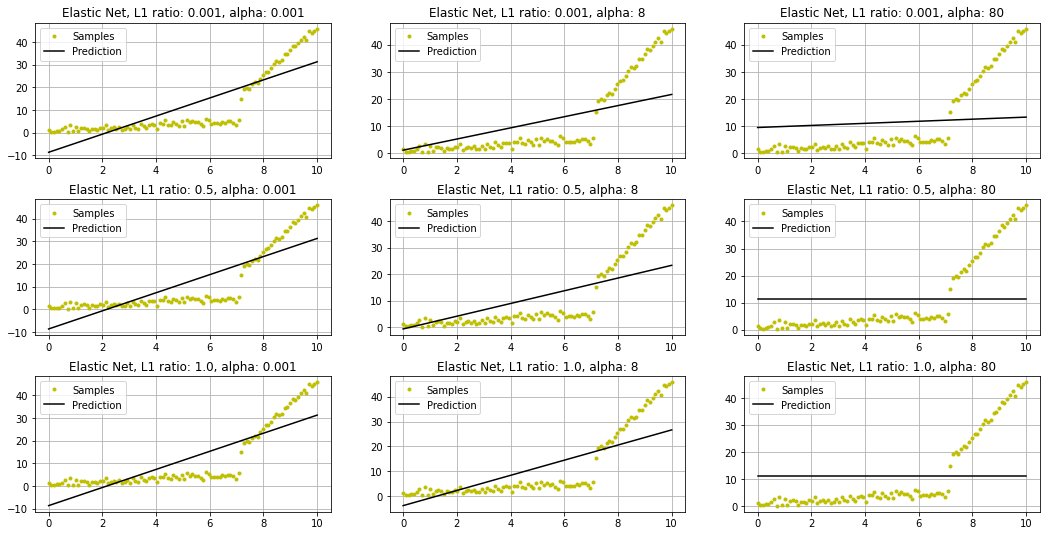

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
from sklearn.linear_model import ElasticNet


fig, axs = plt.subplots(3, 3, figsize=(18,9))
plt.subplots_adjust(hspace=0.3)

def plot(data2D, target1D, predict1D, row, column, title):
    axs[row,column].plot(data2D, target1D, 'y.', markersize=6,
                         label='Samples')
    axs[row,column].plot(data2D, predict1D, 'k-', label='Prediction')
    axs[row,column].legend()
    axs[row,column].set_title('Elastic Net, '+title)
    axs[row,column].grid()
    return

N = 100  # number of samples                      
X = np.linspace(0,10,N)       
y = 0.8*X + np.random.randn(N)  
for i in range(1,30):
    y[-i]+=40-i   # inserting outliners
X = np.vstack([np.zeros(N), X]).T

for l1_ratio, row in zip([0.001,0.5,1.0], [0,1,2]):
    for alpha, column in zip([0.001,8,80], [0,1,2]):
        elastic = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        elastic.fit(X, y)
        y_pred = elastic.predict(X)
        plot(X[:,1], y, y_pred, row, column, 'L1 ratio: '+str(l1_ratio)+', alpha: '+str(alpha))

---

Creado por **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">